In [7]:
import scipy.stats as ss
import math
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
warnings.filterwarnings('ignore')
%matplotlib inline
font = {
        'family' : 'serif',
        'size'   : 26}

matplotlib.rc('font', **font)

In [8]:
df=pd.read_csv('../output_csv/cls_statistic.csv')
model_list=["AB_max","ET_max","RF_max","GB_max","DT_max","SVM_max"]
df_max=df[model_list]
df_max=df_max*100
df_rank=df_max.copy()
for index, row in df_max.iterrows():
    df_rank.loc[index]=len(row) - (ss.rankdata(row)).round()+1
plt.figure(figsize=(12,10))    
df_out=pd.DataFrame(columns=["AB_max","ET_max","RF_max","GB_max","DT_max","SVM_max"],index=[1,2,3,4,5,6])
for index,row in df_out.iterrows():
    for column in df_out.columns:
        out=df_rank[df_rank[column]==index].count()
        df_out.loc[index,column]=out[0]

<Figure size 864x720 with 0 Axes>

In [9]:
df_rank.columns=["AB","ET","RF","GB","DT","SVM"]
df_rank

,AB,ET,RF,GB,DT,SVM
0,1.0,4.0,3.0,2.0,5.0,6.0
1,2.0,3.0,5.0,1.0,6.0,4.0
2,3.0,3.0,3.0,3.0,6.0,3.0
3,3.0,3.0,1.0,1.0,5.0,6.0
4,1.0,3.0,4.0,2.0,6.0,5.0
...,...,...,...,...,...,...
189,2.0,4.0,1.0,3.0,5.0,6.0
190,4.0,1.0,3.0,2.0,5.0,6.0
191,4.0,1.0,5.0,2.0,6.0,3.0
192,3.0,3.0,3.0,3.0,3.0,6.0


In [10]:
# df_rank=pd.DataFrame(columns=["auc","classifiers"])
lst_rank=[]

for idx,col in df_rank.iteritems():
    # print(col.name)
    for item in col:
        lst_rank.append(
            {
                'classifiers':col.name,
                'rank':item,
            }

        )
df_rank_bar=pd.DataFrame(lst_rank)

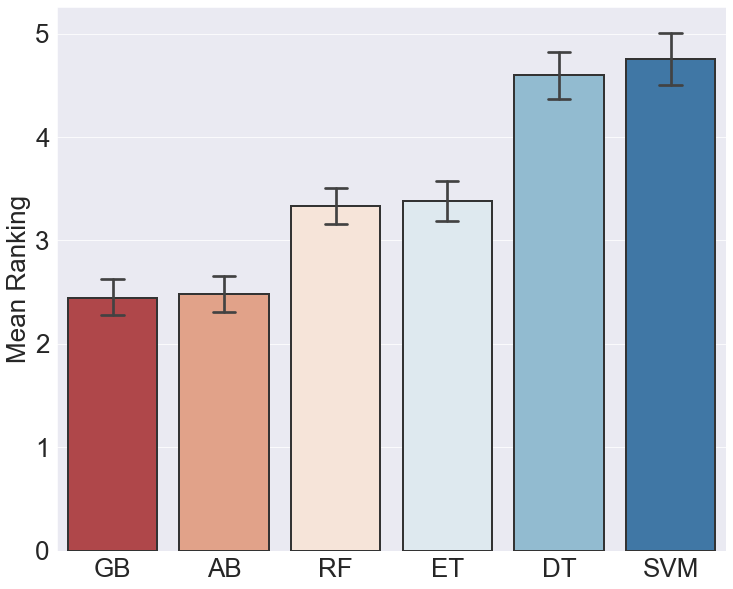

In [12]:
plt.figure(figsize=(12,10))
sns.set_palette("RdBu")
sns.set_style("darkgrid")

# plt.xlabel("Classifiers");
h = plt.gcf()
ax = sns.barplot(x="classifiers", y="rank", data=df_rank_bar,order=["GB","AB","RF","ET","DT","SVM"],capsize=.2,ci=95, linewidth=2, edgecolor=".2")

plt.ylabel("Mean Ranking");
plt.xlabel("");
h.savefig("../output_plots/bar_plot.pdf" ,bbox_inches = 'tight',pad_inches = 0, format='pdf')